In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
df = pd.read_csv('data/stud.csv')
df.head(5)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [97]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [98]:
df.duplicated().sum()

np.int64(0)

In [99]:
cat = [f for f in df.columns if df[f].dtype == 'object']

In [100]:
for i in cat:
    print(f"{i} : {df[i].unique()} \n")

gender : ['female' 'male'] 

race_ethnicity : ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental_level_of_education : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch : ['standard' 'free/reduced'] 

test_preparation_course : ['none' 'completed'] 



In [101]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

In [102]:
print("Categorical Columns:", len(categorical_cols))
print("Numerical Columns:", len(numerical_cols))

Categorical Columns: 5
Numerical Columns: 3


In [103]:
df['Total_score']=df['math_score'] + df['reading_score']+ df['writing_score']
df.head()
df['average']=df['Total_score']/3

In [104]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


<Axes: xlabel='Total_score', ylabel='Count'>

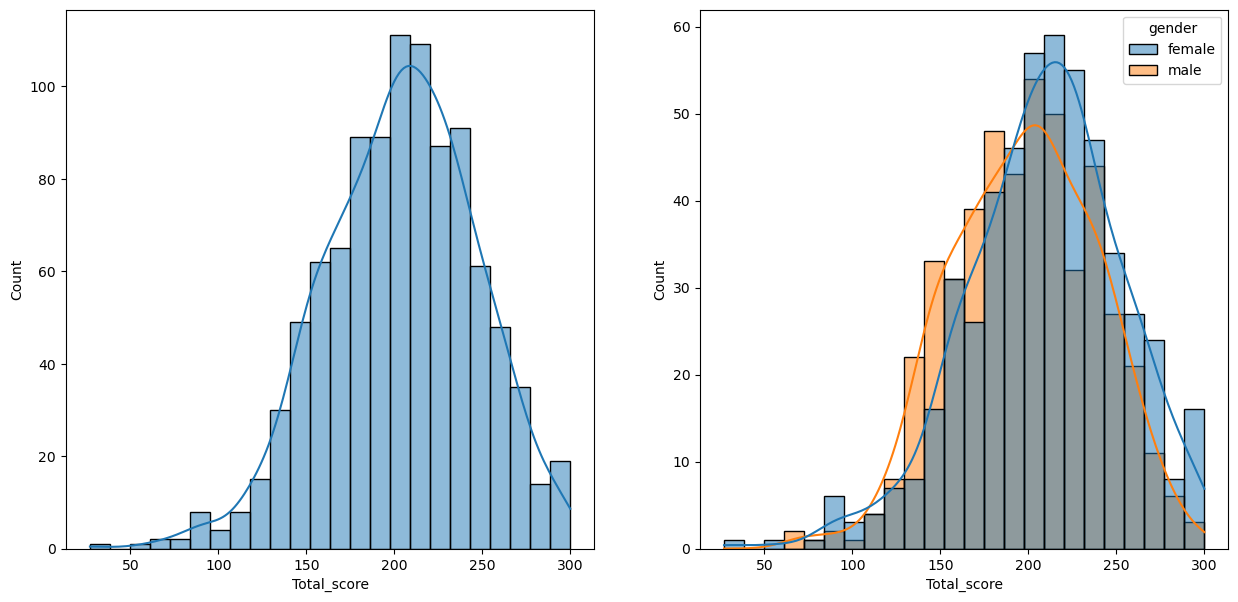

In [105]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Total_score',kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')

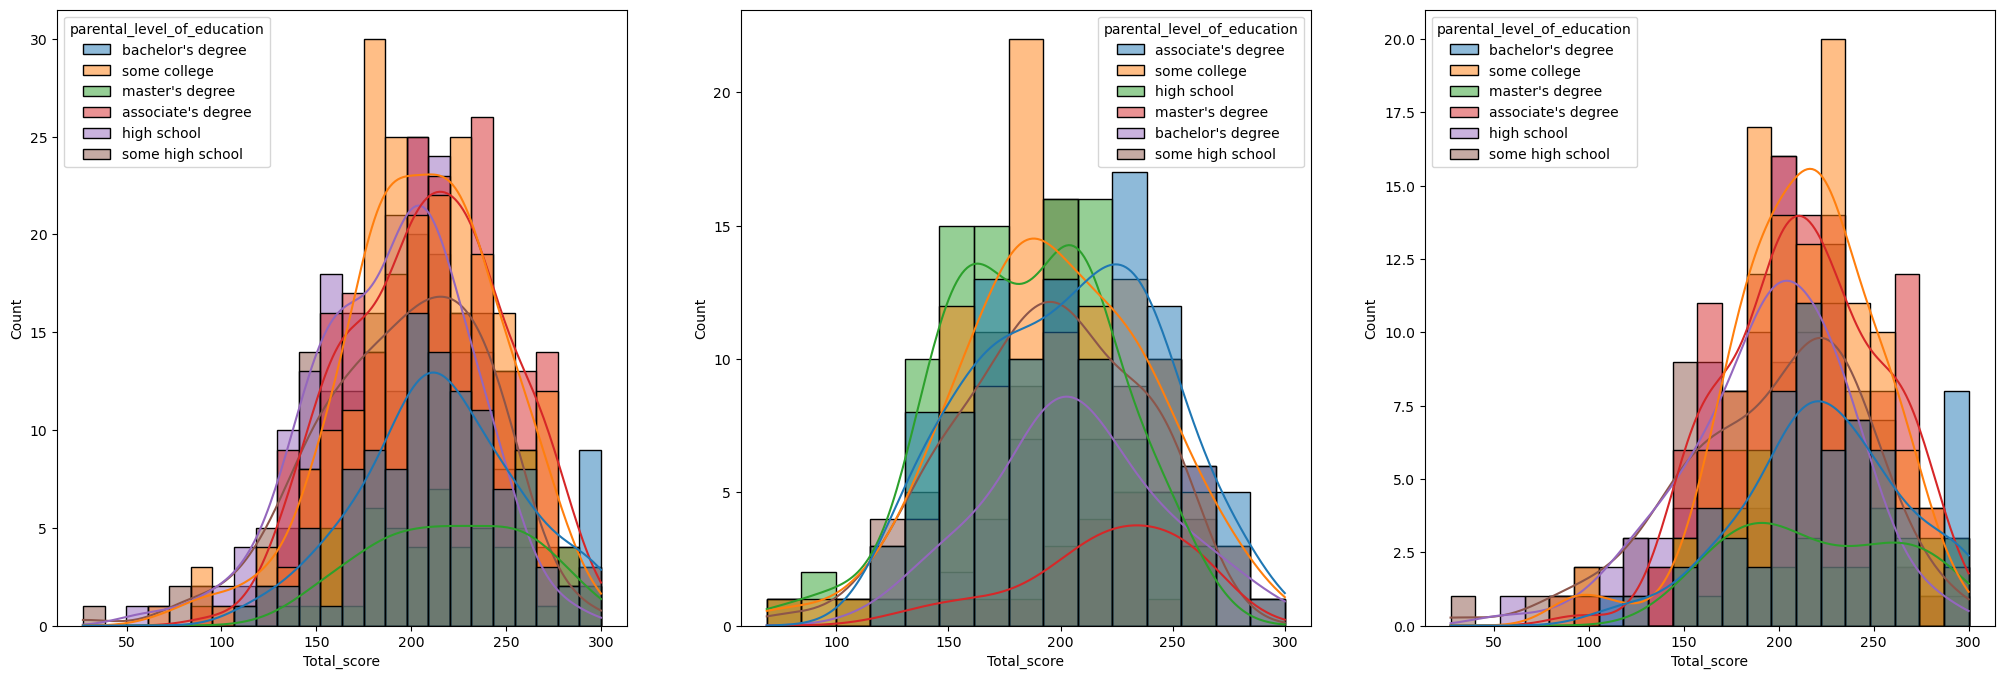

In [106]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(1,3,1)
sns.histplot(data=df,x='Total_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,2)
sns.histplot(data=df[df.gender=='male'],x='Total_score',kde=True,hue='parental_level_of_education')
plt.subplot(1,3,3)
sns.histplot(data=df[df.gender=='female'],x='Total_score',kde=True,hue='parental_level_of_education')
plt.show()

<Axes: xlabel='Total_score'>

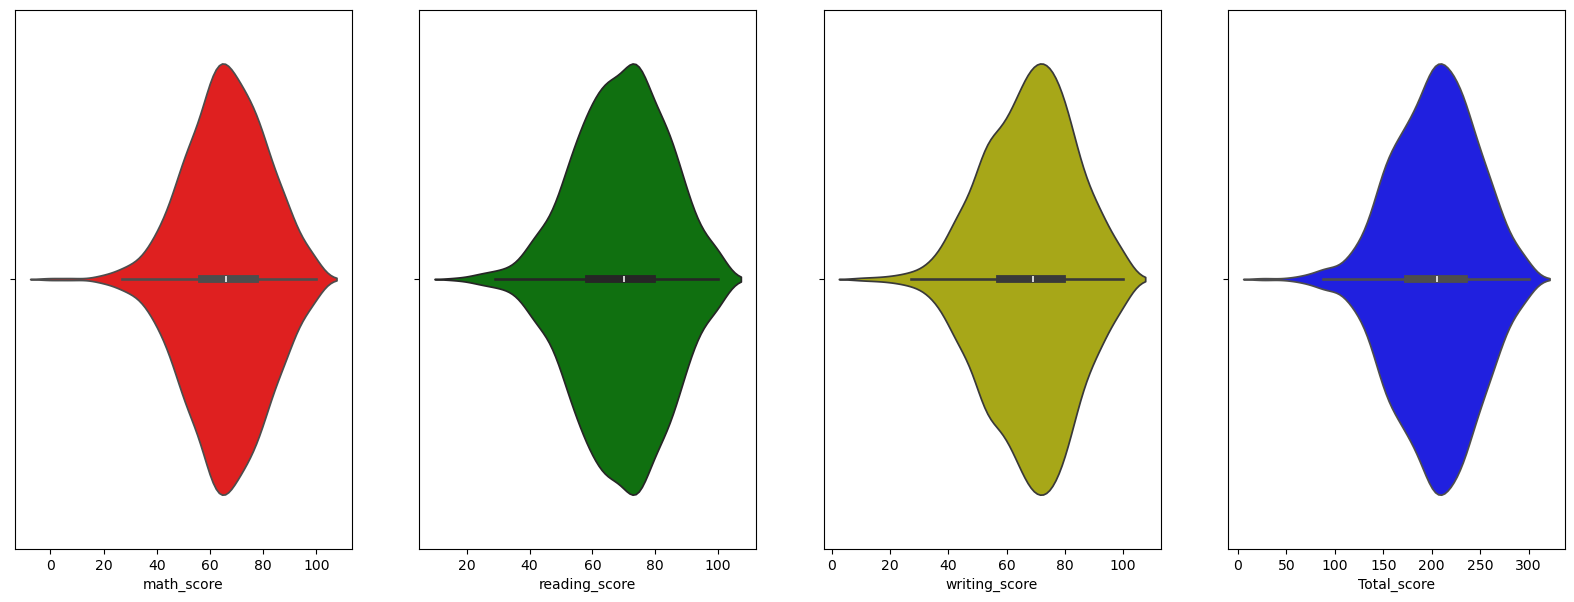

In [107]:
plt.subplots(1,4,figsize=(20,7))
plt.subplot(1,4,1)
sns.violinplot(data=df,x='math_score',color='red')
plt.subplot(1,4,2)
sns.violinplot(data=df,x='reading_score',color='green')
plt.subplot(1,4,3)
sns.violinplot(data=df,x='writing_score',color='y')
plt.subplot(1,4,4)
sns.violinplot(data=df,x='Total_score',color='blue')

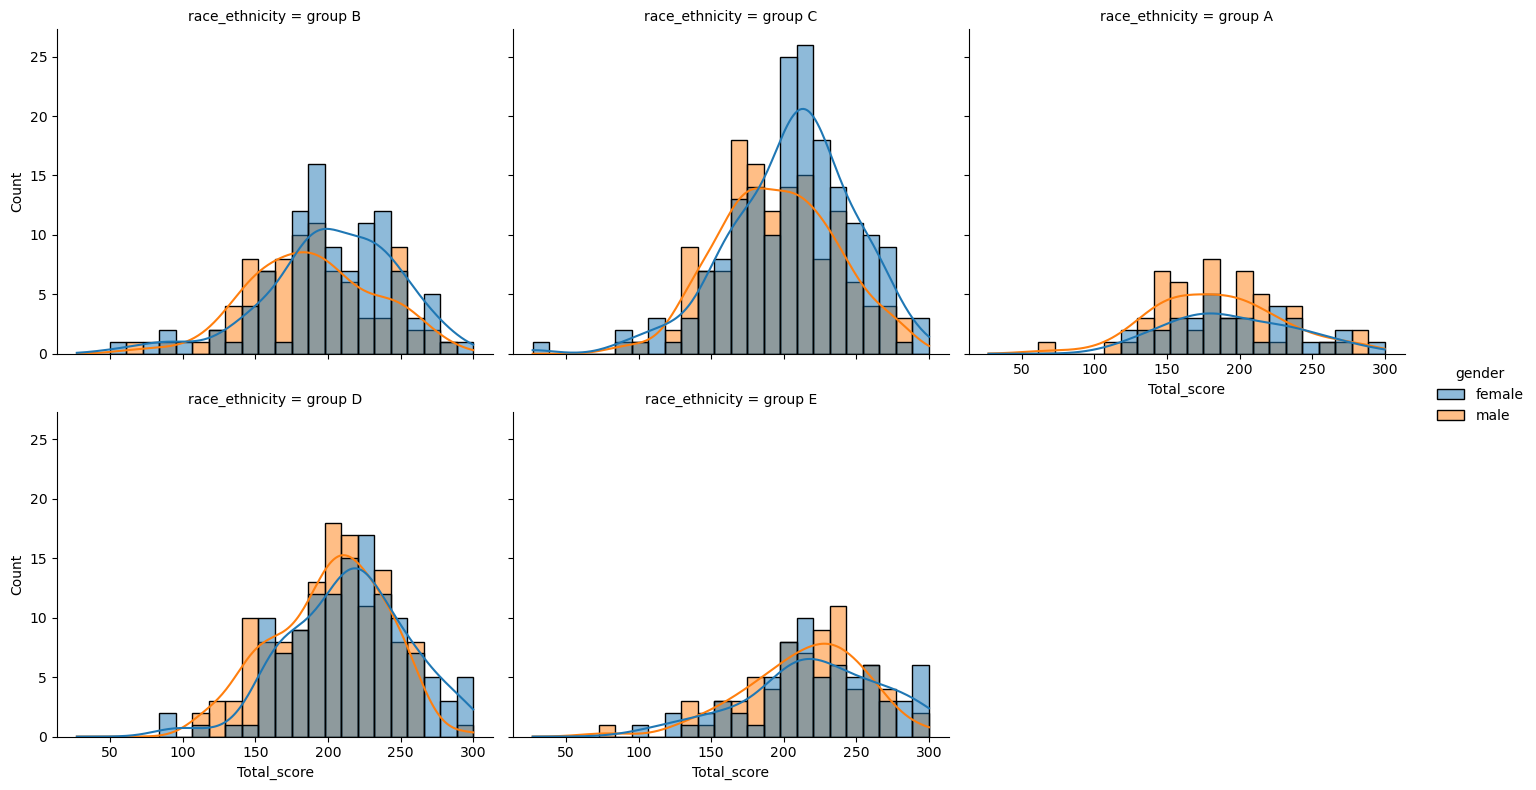

In [ ]:
sns.displot(
    data=df, 
    x='Total_score', 
    hue='gender', 
    col='race_ethnicity', # This replaces your 'for' loop
    kind='hist', 
    kde=True, 
    col_wrap=3,           # Limits plots per row so they aren't too small
    height=4, 
    aspect=1.2
)

plt.show()

Generating Pairplot for category: gender


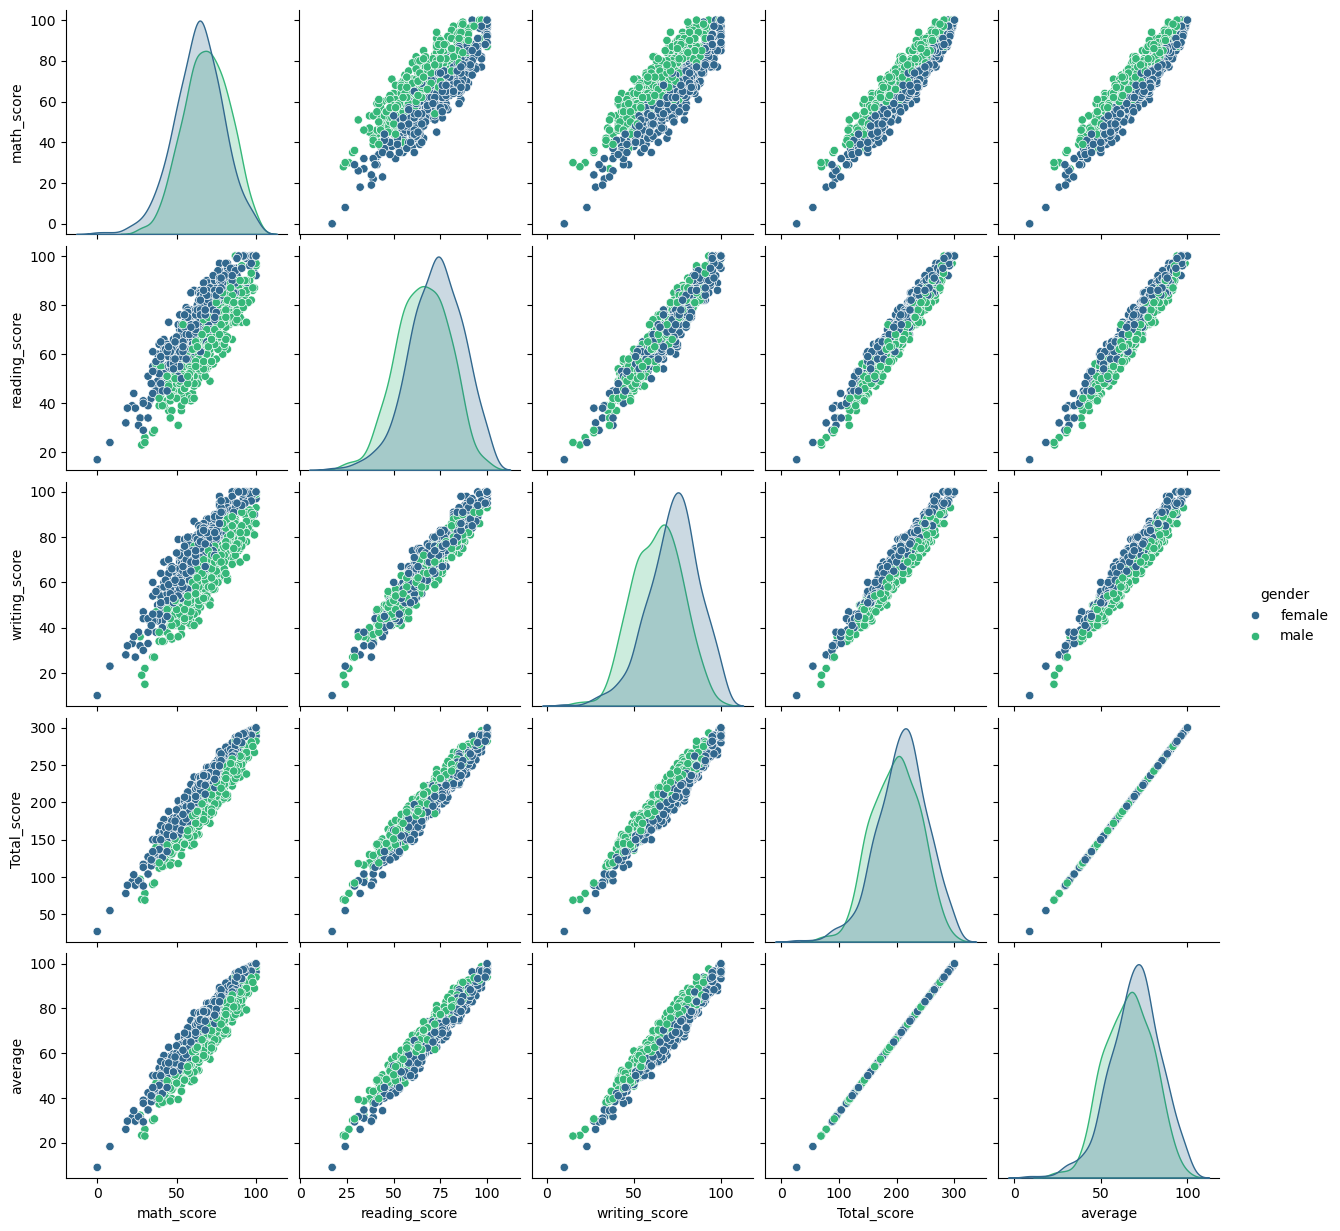

Generating Pairplot for category: race_ethnicity


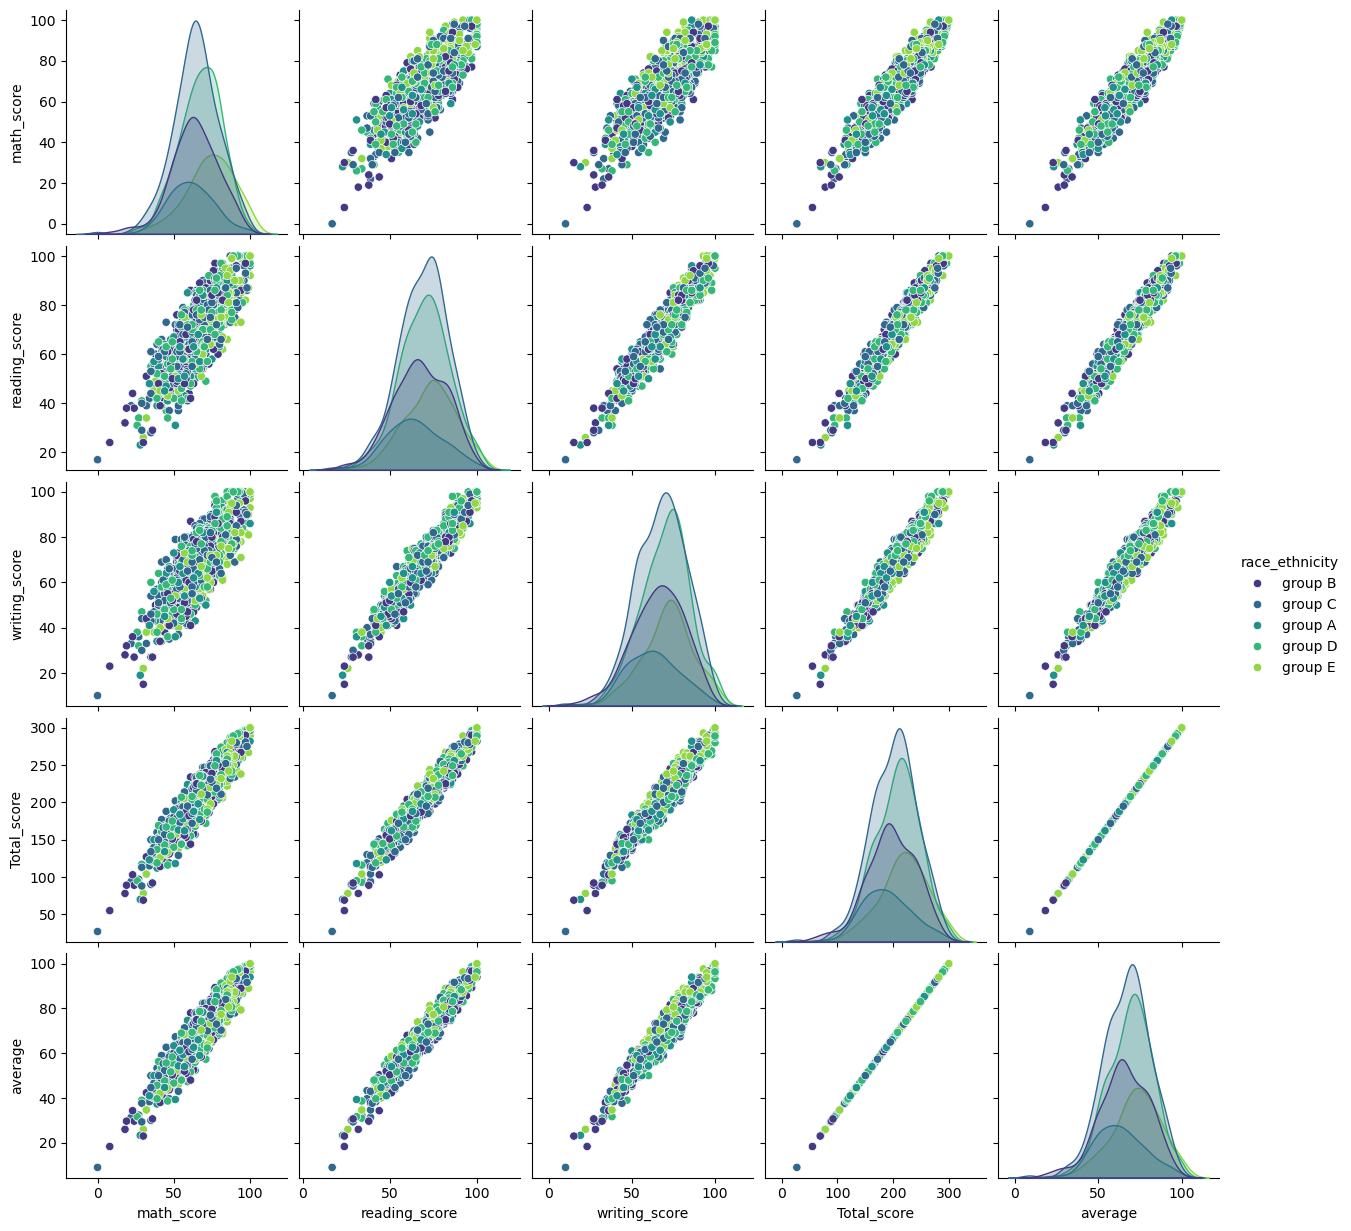

Generating Pairplot for category: parental_level_of_education


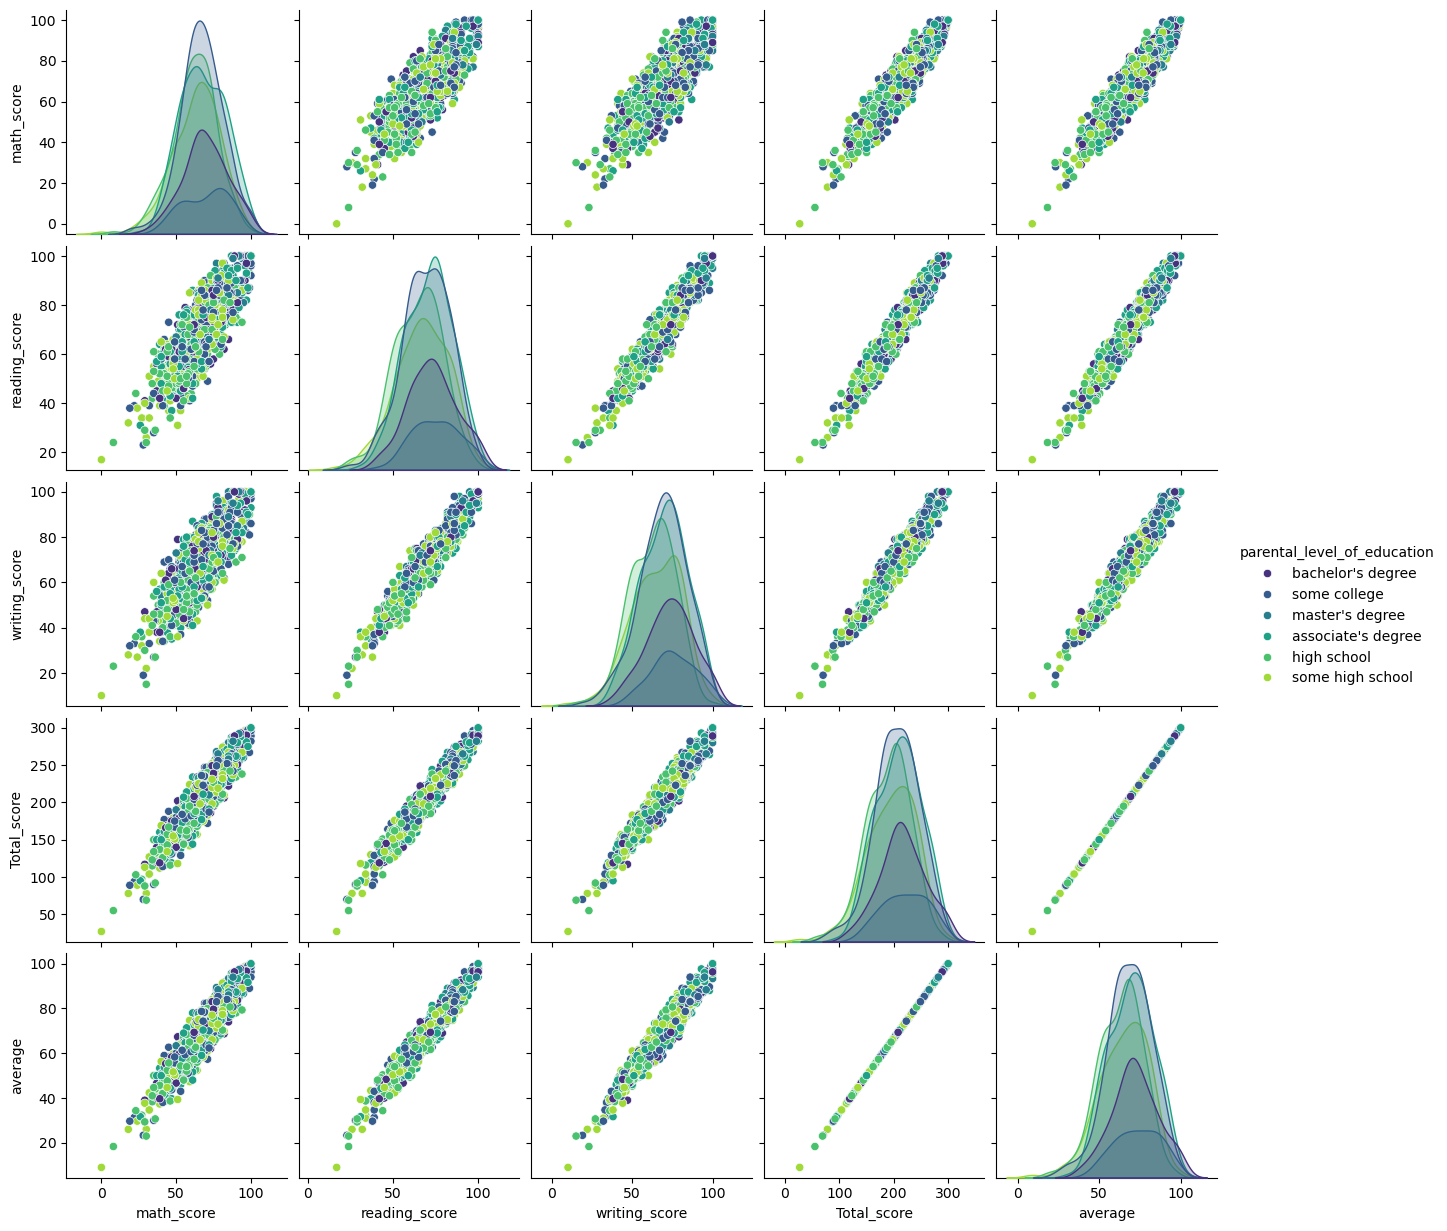

Generating Pairplot for category: lunch


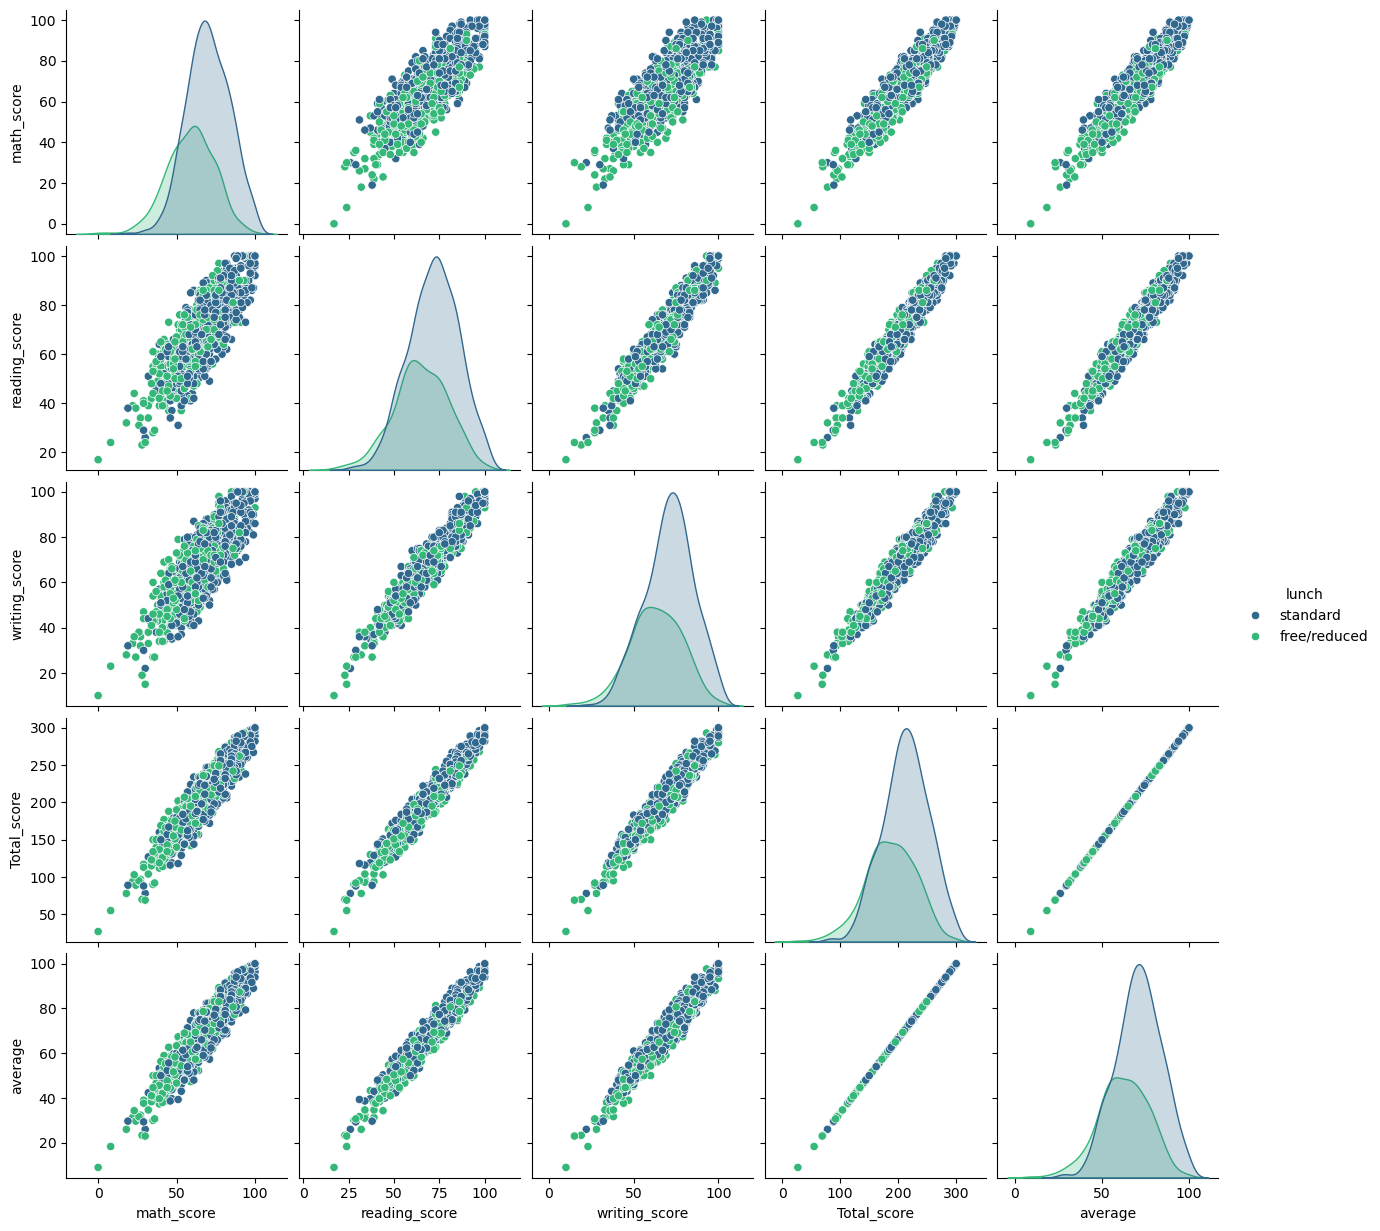

Generating Pairplot for category: test_preparation_course


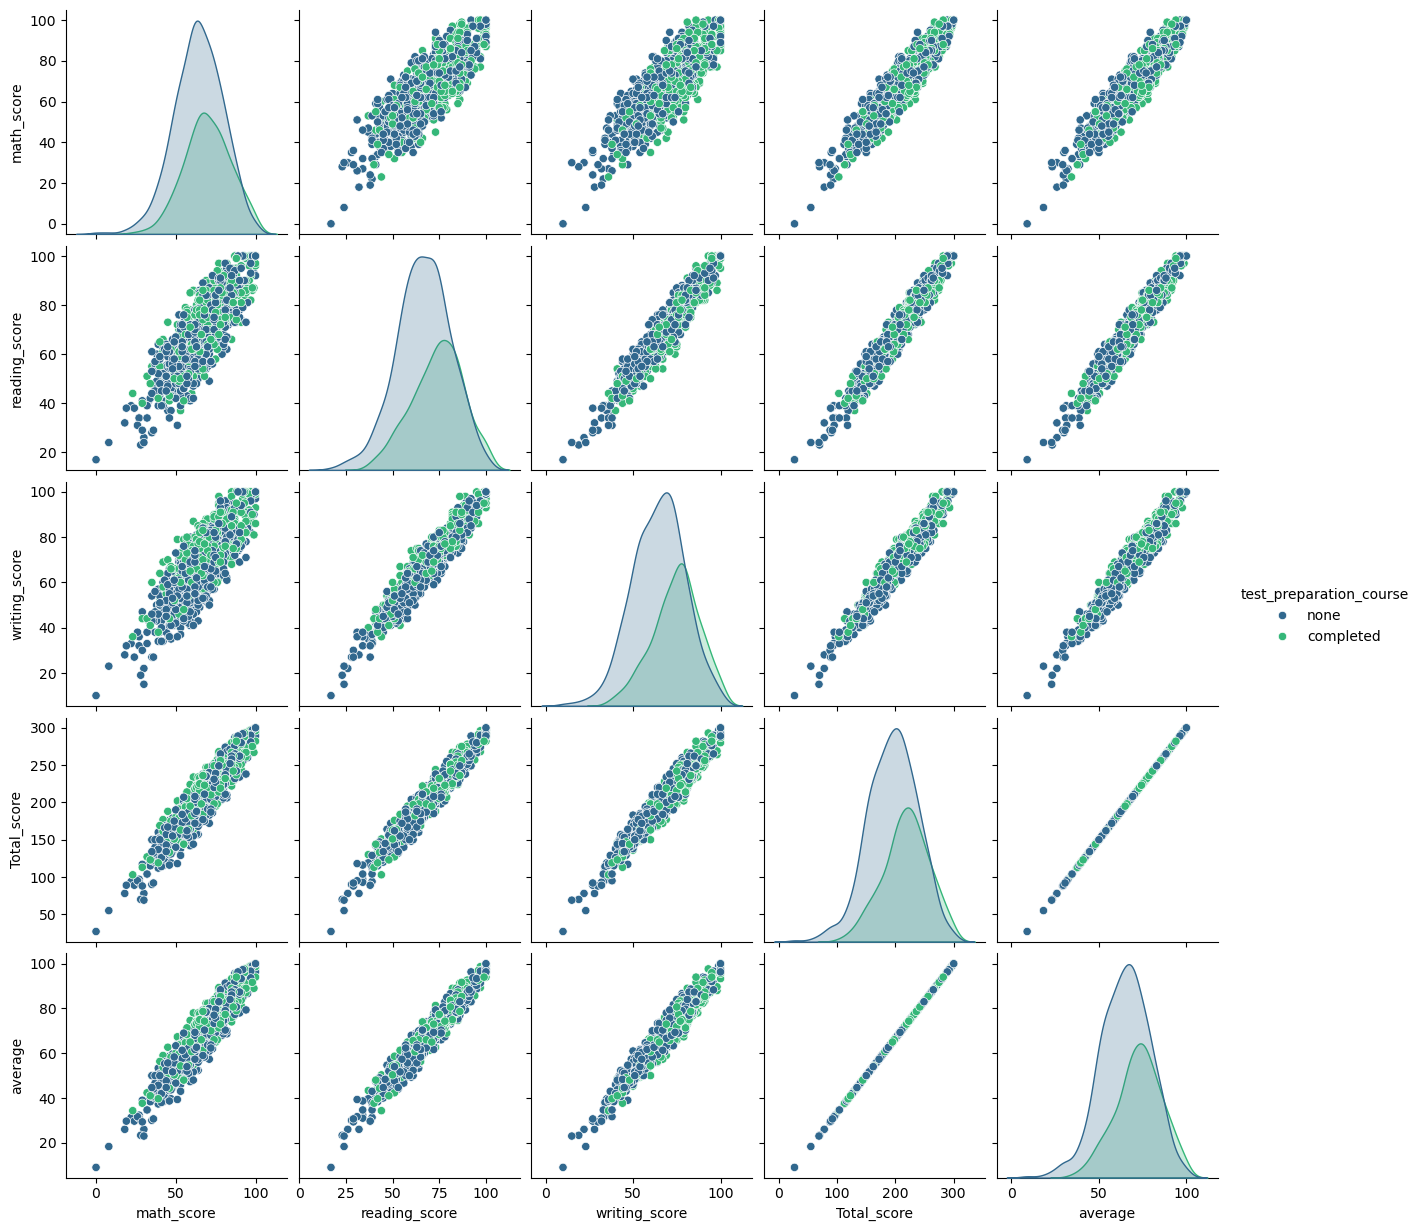

In [117]:
# Assuming cat = ['gender', 'race_ethnicity', 'parental_level_of_education']
for i in cat:
    print(f"Generating Pairplot for category: {i}")
    # Use sns.pairplot, not plt.pie
    sns.pairplot(data=df, hue=i, diag_kind='kde', palette='viridis')
    plt.show()

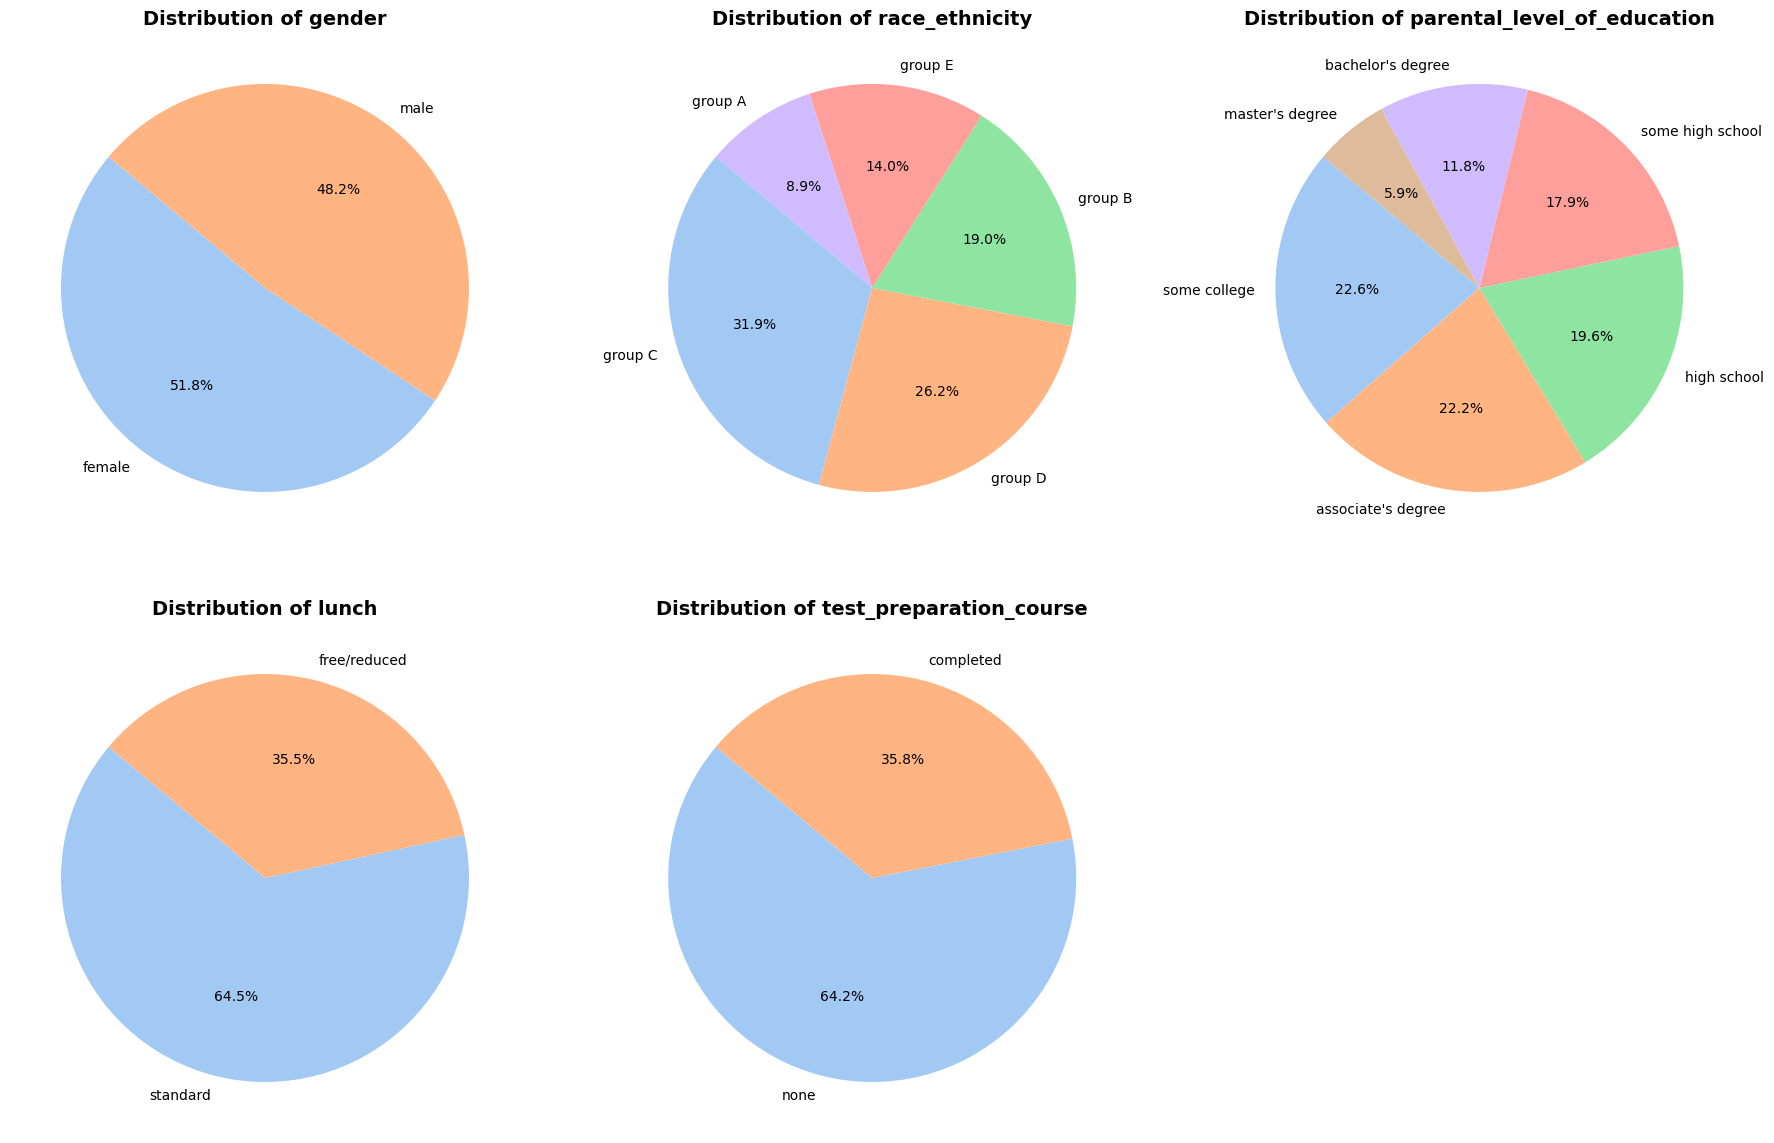

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the categorical columns
cat = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

# 1. Setup the figure and axes (2 rows, 3 columns to fit 5 charts)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten() # Flattens the 2D array of axes to 1D for easy looping

# 2. Loop through categories and plot
for i, col in enumerate(cat):
    counts = df[col].value_counts()
    axes[i].pie(counts, 
                labels=counts.index, 
                autopct='%1.1f%%', 
                startangle=140, 
                colors=sns.color_palette('pastel'))
    axes[i].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')

# 3. Clean up: Remove the 6th empty subplot (since we only have 5 categories)
if len(cat) < len(axes):
    for j in range(len(cat), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()